# Random Forest: Benign vs DDoS

## Baseline

In [1]:
import os
import sys
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./Balanced_Datasets_Baseline/Benign_vs_DDoS.csv")
df['Label'].value_counts()

BENIGN    112731
DDOS      112728
Name: Label, dtype: int64

In [3]:
Y = df["Label"].replace(["BENIGN", "DDOS"],[0,1])
X = df.drop(["Label"], axis=1)
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [4]:
X.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min seg size forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,6,110861755,26,26,616.0,768.0,297.0,0.0,23.692308,80.460062,...,20,198805.454545,64223.338986,392446.0,179351.0,9.863210e+06,413171.813769,10007500.0,8632089.0,0
1,6,40335006,9,10,8.0,62.0,1.0,0.0,0.888889,0.333333,...,20,90226.500000,43.554563,90287.0,90185.0,9.993447e+06,40495.753715,10018634.0,9933709.0,0
2,0,113244633,56,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,248176.750000,859690.585416,2978061.0,4.0,9.188876e+06,809901.667647,9882838.0,6781893.0,0
3,6,95628949,21,20,20.0,0.0,1.0,0.0,0.952381,0.218218,...,20,14901.222222,177.422362,15367.0,14798.0,1.001418e+07,5184.077926,10016037.0,10000366.0,0
4,6,95613243,21,20,20.0,0.0,1.0,0.0,0.952381,0.218218,...,20,26508.333333,17.902514,26534.0,26473.0,1.000431e+07,21.430119,10004365.0,10004289.0,0


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [6]:
print(len(X_train.index))
print(len(X_test.index))

180367
45092


In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


In [8]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [9]:
model.score(X_test, Y_test)

0.9997117005233744

In [10]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [11]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
Y_predicted = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted)


<AxesSubplot:>

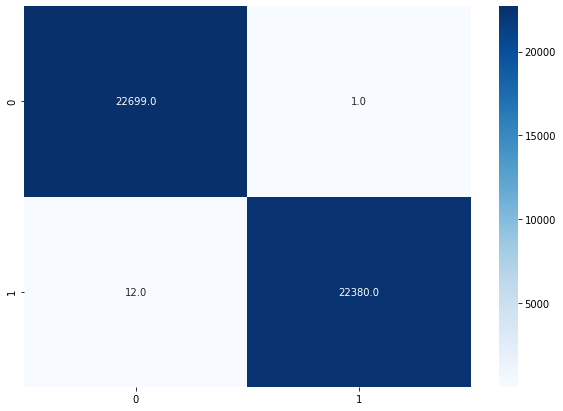

In [12]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap='Blues', fmt='.1f')


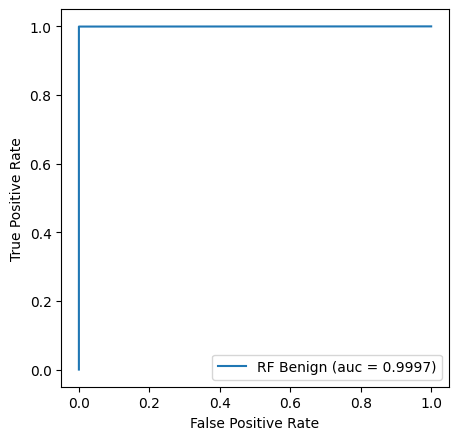

In [13]:
from sklearn.metrics import roc_curve, auc
RF_fpr, RF_tpr, threshold = roc_curve(Y_test, Y_predicted)
auc_RF = auc(RF_fpr, RF_tpr)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(RF_fpr, RF_tpr,linestyle='-', label="RF Benign (auc = %.4f)" % auc_RF)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [32]:
print("f1: ", f1_score(Y_test, Y_predicted))
print("recall: ", recall_score(Y_test, Y_predicted))
print("precision: ", precision_score(Y_test, Y_predicted))

f1:  0.9997096464387019
recall:  0.9994640943193998
precision:  0.9999553192440016


## Time Based

In [14]:
df_time = pd.read_csv("./Balanced_Datasets_Time_Based/Benign_vs_DDoS.csv")
df_time['Label'].value_counts()

BENIGN    112731
DDOS      112728
Name: Label, dtype: int64

In [15]:
Y_time = df_time["Label"].replace(["BENIGN", "DDOS"],[0,1])
X_time = df_time.drop(["Label"], axis=1)
Y_time.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [16]:
X_time_train, X_time_test, Y_time_train, Y_time_test = train_test_split(X_time,Y_time, test_size=0.2)
print(len(X_time_train.index))
print(len(X_time_test.index))

180367
45092


In [17]:
model.fit(X_time_train,Y_time_train)

RandomForestClassifier()

In [18]:
model.score(X_time_test, Y_time_test)

0.9848975428013839

In [19]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<AxesSubplot:>

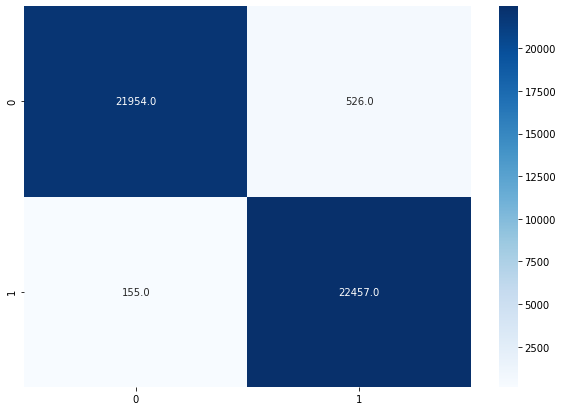

In [20]:
Y_time_predicted = model.predict(X_time_test)
cm = confusion_matrix(Y_time_test, Y_time_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap='Blues', fmt='.1f')

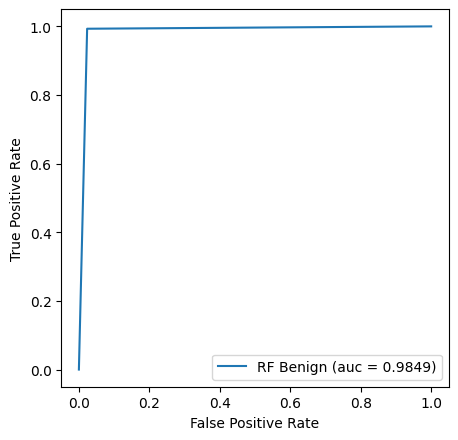

In [21]:
RF_time_fpr, RF_time_tpr, threshold = roc_curve(Y_time_test, Y_time_predicted)
auc_RF_time = auc(RF_time_fpr, RF_time_tpr)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(RF_time_fpr, RF_time_tpr,linestyle='-', label="RF Benign (auc = %.4f)" % auc_RF_time)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [31]:
print("f1: ", f1_score(Y_time_test, Y_time_predicted))
print("recall: ", recall_score(Y_time_test, Y_time_predicted))
print("precision: ", precision_score(Y_time_test, Y_time_predicted))

f1:  0.9850641517710275
recall:  0.9931452326198479
precision:  0.9771135186877257


## Comparison and Summary